# BCI IV Competition Dataset 2a Analysis

## Importing packages

In [1]:
import os
import numpy as np
import pandas as pd
from pprint import pprint
import scipy.io as sio
import seaborn as sns
import mne
from mne import Epochs, pick_types, events_from_annotations
from mne.channels import make_standard_montage
from mne.io import concatenate_raws, read_raw_edf
from mne.datasets import eegbci
from mne.decoding import CSP

import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import ShuffleSplit, cross_val_score

## Reading in gdf data
- updated set eog param in addition to preload
- set var names of raw to path names to speed up function usage later on

In [2]:
# As we don't need to keep track of eye blinks, we do not need to keep track of the EOG channels.
# Therefore we will be dropping them.

raw1 = mne.io.read_raw_gdf('./BCICIV_2a_gdf/A01T.gdf', eog=['EOG-left','EOG-central','EOG-right'], preload=True)
raw1.drop_channels(['EOG-left','EOG-central','EOG-right'])
raw2 = mne.io.read_raw_gdf('./BCICIV_2a_gdf/A02T.gdf', eog=['EOG-left','EOG-central','EOG-right'], preload=True)
raw2.drop_channels(['EOG-left','EOG-central','EOG-right'])
raw3 = mne.io.read_raw_gdf('./BCICIV_2a_gdf/A03T.gdf', eog=['EOG-left','EOG-central','EOG-right'], preload=True)
raw3.drop_channels(['EOG-left','EOG-central','EOG-right'])
raw4 = mne.io.read_raw_gdf('./BCICIV_2a_gdf/A04T.gdf', eog=['EOG-left','EOG-central','EOG-right'], preload=True)
raw4.drop_channels(['EOG-left','EOG-central','EOG-right'])
raw5 = mne.io.read_raw_gdf('./BCICIV_2a_gdf/A05T.gdf', eog=['EOG-left','EOG-central','EOG-right'], preload=True)
raw5.drop_channels(['EOG-left','EOG-central','EOG-right'])
raw6 = mne.io.read_raw_gdf('./BCICIV_2a_gdf/A06T.gdf', eog=['EOG-left','EOG-central','EOG-right'], preload=True)
raw6.drop_channels(['EOG-left','EOG-central','EOG-right'])
raw7 = mne.io.read_raw_gdf('./BCICIV_2a_gdf/A07T.gdf', eog=['EOG-left','EOG-central','EOG-right'], preload=True)
raw7.drop_channels(['EOG-left','EOG-central','EOG-right'])
raw8 = mne.io.read_raw_gdf('./BCICIV_2a_gdf/A08T.gdf', eog=['EOG-left','EOG-central','EOG-right'], preload=True)
raw8.drop_channels(['EOG-left','EOG-central','EOG-right'])
raw9 = mne.io.read_raw_gdf('./BCICIV_2a_gdf/A09T.gdf', eog=['EOG-left','EOG-central','EOG-right'], preload=True)
raw9.drop_channels(['EOG-left','EOG-central','EOG-right'])


# raw.append(raw2)
# raw.append(raw3)
# raw.append(raw4)
# raw.append(raw5)
# raw.append(raw6)
# raw.append(raw7)
# raw.append(raw8)
# raw.append(raw9)

Extracting EDF parameters from /home/hyk001/COGS189Project/BCICIV_2a_gdf/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


/opt/conda/lib/python3.9/contextlib.py:124: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Extracting EDF parameters from /home/hyk001/COGS189Project/BCICIV_2a_gdf/A02T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 677168  =      0.000 ...  2708.672 secs...


/opt/conda/lib/python3.9/contextlib.py:124: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Extracting EDF parameters from /home/hyk001/COGS189Project/BCICIV_2a_gdf/A03T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 660529  =      0.000 ...  2642.116 secs...


/opt/conda/lib/python3.9/contextlib.py:124: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Extracting EDF parameters from /home/hyk001/COGS189Project/BCICIV_2a_gdf/A04T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 600914  =      0.000 ...  2403.656 secs...


/opt/conda/lib/python3.9/contextlib.py:124: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Extracting EDF parameters from /home/hyk001/COGS189Project/BCICIV_2a_gdf/A05T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 686119  =      0.000 ...  2744.476 secs...


/opt/conda/lib/python3.9/contextlib.py:124: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Extracting EDF parameters from /home/hyk001/COGS189Project/BCICIV_2a_gdf/A06T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 678979  =      0.000 ...  2715.916 secs...


/opt/conda/lib/python3.9/contextlib.py:124: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Extracting EDF parameters from /home/hyk001/COGS189Project/BCICIV_2a_gdf/A07T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 681070  =      0.000 ...  2724.280 secs...


/opt/conda/lib/python3.9/contextlib.py:124: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Extracting EDF parameters from /home/hyk001/COGS189Project/BCICIV_2a_gdf/A08T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 675269  =      0.000 ...  2701.076 secs...


/opt/conda/lib/python3.9/contextlib.py:124: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Extracting EDF parameters from /home/hyk001/COGS189Project/BCICIV_2a_gdf/A09T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 673327  =      0.000 ...  2693.308 secs...


/opt/conda/lib/python3.9/contextlib.py:124: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


<RawGDF | A09T.gdf, 22 x 673328 (2693.3 s), ~113.0 MB, data loaded>

## Added three functions 

    1. read_data(input raw): returns features and label data
    2. plot_data_events(input raw): returns plot of events along time fs
    3. plot_data_evoked(input raw): returns plot of evoked averages epochs for each subject and four classes

In [3]:
def read_data(raw):
    raw.set_eeg_reference()
    events=mne.events_from_annotations(raw)
    epoch=mne.Epochs(raw,events[0],event_id=[7,8,9,10],tmin=-0.1,tmax=0.7, on_missing='warn')
    features=epoch.get_data()
    labels=epoch.events[:,-1]
    
    return features, labels

In [4]:
def plot_data_events(raw):
    raw.set_eeg_reference()
    events=mne.events_from_annotations(raw)
    epoch=mne.Epochs(raw,events[0],event_id=[7,8,9,10],tmin=-0.1,tmax=0.7, on_missing='warn')
    features=epoch.get_data()
    labels=epoch.events[:,-1]
    
    event_dict={
        'reject':1,
        'eye move':2,
        'eye open':3,
        'eye close':4,
        'new run':5,
        'new trial':6,
        'class 1':7, 'class 2':8, 'class 3':9,'class 4':10
    }
    
    fig=mne.viz.plot_events(events[0],event_id=event_dict,
                        sfreq=raw.info['sfreq'],
                        first_samp=raw.first_samp)

In [5]:
def plot_data_evoked(raw):
    raw.set_eeg_reference()
    events=mne.events_from_annotations(raw)
    epoch=mne.Epochs(raw,events[0],event_id=[7,8,9,10],tmin=-0.1,tmax=0.7, on_missing='warn')
    features=epoch.get_data()
    labels=epoch.events[:,-1]
    
    evoked_1=epoch['7'].average()
    evoked_2=epoch['8'].average()
    evoked_3=epoch['9'].average()
    evoked_4=epoch['10'].average()
    dicts={'left':evoked_1,'right':evoked_2,'foot':evoked_3,'tongue':evoked_4}
    
    fig=mne.viz.plot_compare_evokeds(dicts)
    
    return fig

## Use plot events function for all 9 subjects

In [6]:
feature1, label1 = read_data(raw1)
feature2, label2 = read_data(raw2)
feature3, label3 = read_data(raw3)
feature4, label4 = read_data(raw4)
feature5, label5 = read_data(raw5)
feature6, label6 = read_data(raw6)
feature7, label7 = read_data(raw7)
feature8, label8 = read_data(raw8)
feature9, label9 = read_data(raw9)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referenci

/tmp/ipykernel_467/2945896843.py:4: RuntimeWarning: No matching events found for 9 (event id 9)
  epoch=mne.Epochs(raw,events[0],event_id=[7,8,9,10],tmin=-0.1,tmax=0.7, on_missing='warn')
/tmp/ipykernel_467/2945896843.py:4: RuntimeWarning: No matching events found for 10 (event id 10)
  epoch=mne.Epochs(raw,events[0],event_id=[7,8,9,10],tmin=-0.1,tmax=0.7, on_missing='warn')


0 bad epochs dropped
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 original time points ...
0 bad epochs dropped
EEG channel type sele

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 original time points ...
0 bad epochs dropped


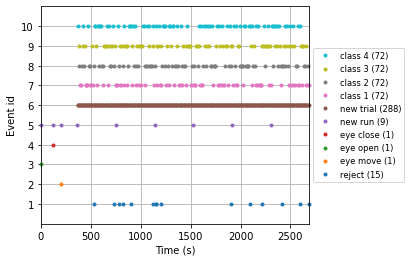

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 original time points ...
0 bad epochs dropped


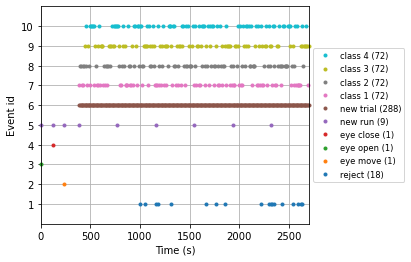

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 original time points ...
0 bad epochs dropped


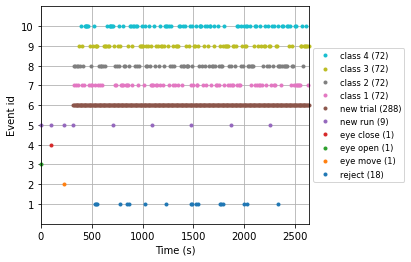

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 original time points ...
0 bad epochs dropped


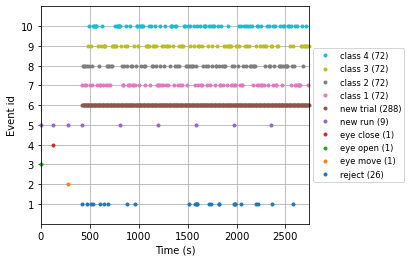

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 original time points ...
0 bad epochs dropped


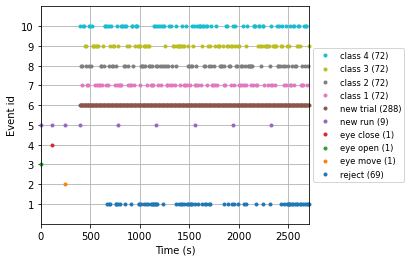

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 original time points ...
0 bad epochs dropped


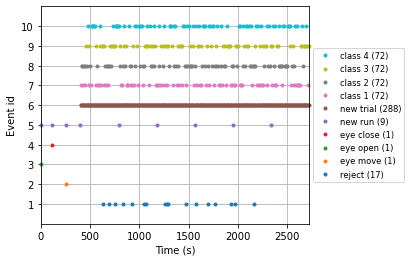

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 original time points ...
0 bad epochs dropped


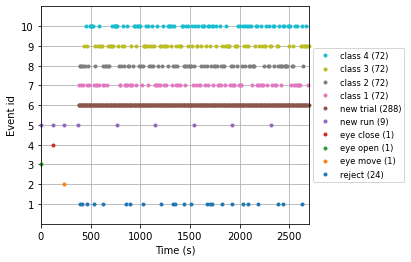

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 original time points ...
0 bad epochs dropped


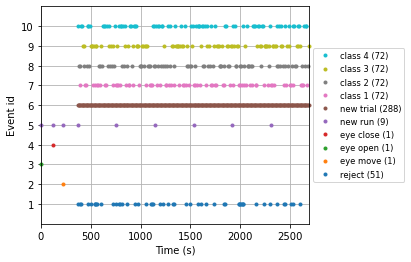

In [7]:
plot_data_events(raw1)
plot_data_events(raw2)
plot_data_events(raw3)
plot_data_events(raw5)
plot_data_events(raw6)
plot_data_events(raw7)
plot_data_events(raw8)
plot_data_events(raw9)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 original time points ...
0 bad epochs dropped
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


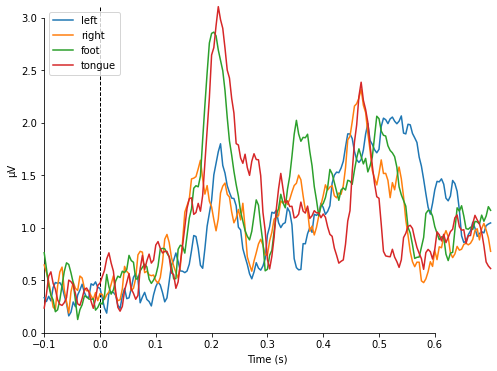

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 original time points ...
0 bad epochs dropped
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


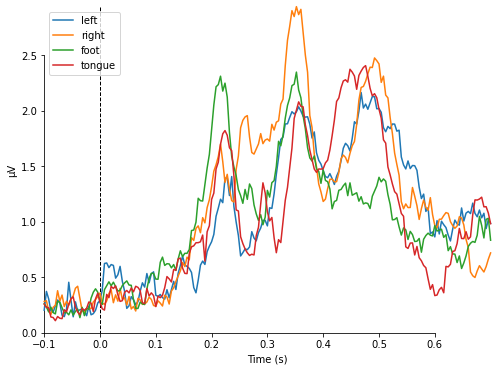

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 original time points ...
0 bad epochs dropped
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


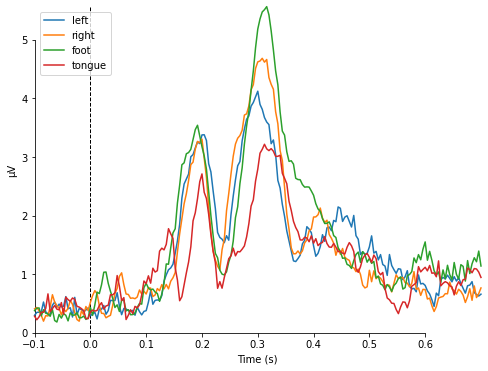

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 original time points ...
0 bad epochs dropped
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


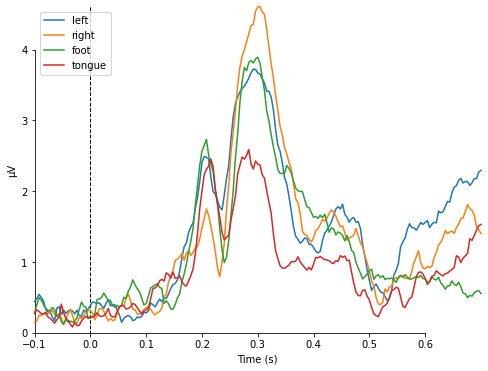

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 original time points ...
0 bad epochs dropped
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


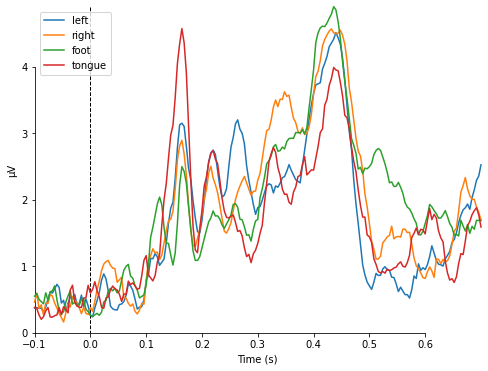

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 original time points ...
0 bad epochs dropped
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


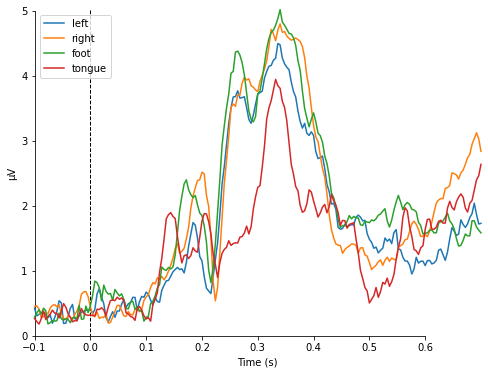

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 original time points ...
0 bad epochs dropped
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


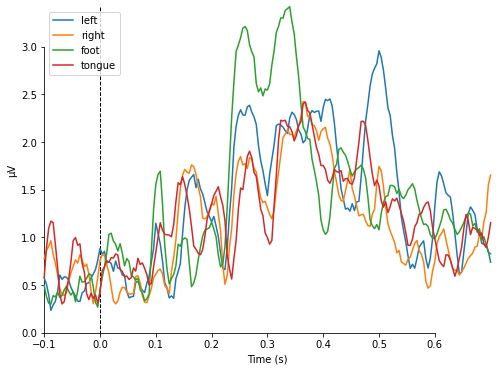

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 original time points ...
0 bad epochs dropped
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


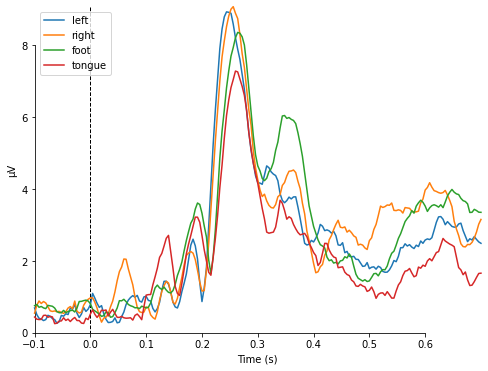

[<Figure size 576x432 with 1 Axes>]

In [8]:
plot_data_evoked(raw1)
plot_data_evoked(raw2)
plot_data_evoked(raw3)
plot_data_evoked(raw5)
plot_data_evoked(raw6)
plot_data_evoked(raw7)
plot_data_evoked(raw8)
plot_data_evoked(raw9)

At this point, we decided not to use A04T as, according to documentation, this specific dataset did not record all 4 classes.

### Creating filters and epochs with methods

In [9]:
# Renaming channels to work with montage standard
def standardize(raw):
    raw.rename_channels(lambda x: x.strip('EEG-'))
    montage = mne.channels.make_standard_montage('standard_1005')
    
    raw.set_montage(montage, on_missing = 'ignore')

In [10]:
# Creating list as we only need channels Cz, C3, C4 and Pz sensors
exclude = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', 
'12', '13', '14', '15', '16', 'OG-LEFT', 'OG-CENTRAL', 'OG-RIGHT', 'OG-1', 'OG-2', 'OG-3', 'Fz']

In [11]:
# Adding bandpass filters
def createFilter(raw):
    raw.filter(8., 30., fir_design = 'firwin', skip_by_annotation = 'edge')
    picks = pick_types(raw.info, meg = False, eeg = True, stim = False, eog = False,
                   exclude = exclude)
    
    return picks

In [12]:
# Reading epochs
def createEpochs(raw, events):
    epochs = Epochs(raw, events, event_id, 0, 6, proj = True, picks = picks, baseline = None, preload = True)
    epochs_train = epochs.copy().crop(tmin = 1.,tmax = 4.)
    
    return epochs, epochs_train

We require a filter to sort out each type of event individually, as we can only compare two at a time. We will be comparing all events to each other (6 total).

In [13]:
# Creating filters to sort events
def filterLeftRight(events):
    finalArray = []
    for event in events:
        if event[2] == 7 or event[2] == 8:
            finalArray.append(event)
    return finalArray

def filterLeftFoot(events):
    finalArray = []
    for event in events:
        if event[2] == 7 or event[2] == 9:
            finalArray.append(event)
    return finalArray

def filterLeftTongue(events):
    finalArray = []
    for event in events:
        if event[2] == 7 or event[2] == 10:
            finalArray.append(event)
    return finalArray

def filterRightFoot(events):
    finalArray = []
    for event in events:
        if event[2] == 8 or event[2] == 9:
            finalArray.append(event)
    return finalArray

def filterRightTongue(events):
    finalArray = []
    for event in events:
        if event[2] == 8 or event[2] == 10:
            finalArray.append(event)
    return finalArray

def filterFootTongue(events):
    finalArray = []
    for event in events:
        if event[2] == 9 or event[2] == 10:
            finalArray.append(event)
    return finalArray

## Using CSP and LDA to analyze each dataset

In this section, we will be using CSP and LDA to compare two sets together. 

In [14]:
# Put all data into one array
raw_list = [raw1, raw2, raw3, raw5, raw6, raw7, raw8, raw9]

Methods we will use to analyze

In [15]:
# Using a monte-carlo cross-validation generator to reduce variance
# Setting random_state = 0 so all random numbers will be the same instead of different each time (like in A4)
# 5 iterations in 0.2 splits

def crossValidation(epochs, epochs_train):
    epochs_data = epochs.get_data()
    epochs_data_train = epochs_train.get_data()
    cv = ShuffleSplit(5, test_size = 0.2, random_state = 0)
    cv_split = cv.split(epochs_data_train)
    labels = epochs.events[:, -1] - 2
    
    return epochs_data, epochs_data_train, cv, cv_split, labels

In [16]:
def fillScores(clf, epochs_data_train, labels, cv):
    scores = []
    scores = cross_val_score(clf, epochs_data_train, labels, cv = cv, n_jobs = 1)
    
    return scores

In [17]:
# create + plot CSP patterns estimated on full data for visualization
def plotCSP(epochs_data, labels):
    csp = CSP(n_components = 4, reg = None, log = True, norm_trace = False)
    
    csp.fit_transform(epochs_data, labels)
    csp.plot_patterns(epochs.info, ch_type = 'eeg', units = 'Patterns (AU)', size = 1.5)
    
    return csp

In [18]:
# Printing the results of LDA
def printResults(labels, scores):
    class_balance = np.mean(labels == labels[0])
    class_balance = max(class_balance, 1. - class_balance)
    return ("LDA Classification accuracy: %f / Chance level: %f" % (np.mean(scores),
                                                          class_balance))

### Left and Right

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1501 original time points ...
1 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1.3e-06 (2.2e-16 eps * 4 dim * 1.4e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.3e-06 (2.2e-16 eps * 4 dim * 1.4e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


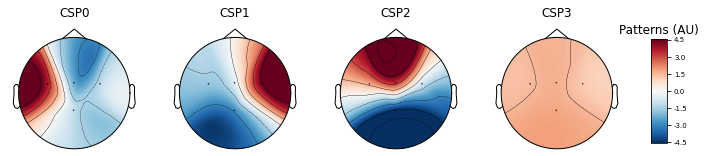

Computing rank from data with rank=None
    Using tolerance 7.7e-07 (2.2e-16 eps * 4 dim * 8.7e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.4e-07 (2.2e-16 eps * 4 dim * 8.3e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.5e-07 (2.2e-16 eps * 4 dim * 8.5e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.6e-07 (2.2e-16 eps * 4 dim * 8.6e+08  max singular value)
    Estimated rank 

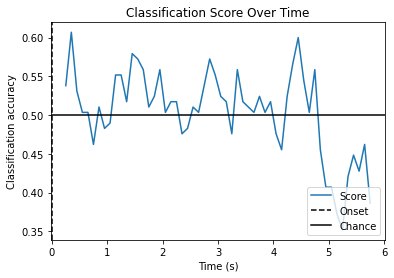

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1501 original time points ...
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1.2e-06 (2.2e-16 eps * 4 dim * 1.3e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-06 (2.2e-16 eps * 4 dim * 1.4e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


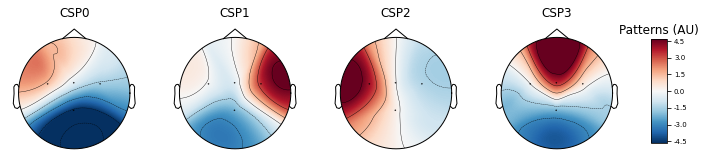

Computing rank from data with rank=None
    Using tolerance 6.5e-07 (2.2e-16 eps * 4 dim * 7.3e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.6e-07 (2.2e-16 eps * 4 dim * 7.5e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.6e-07 (2.2e-16 eps * 4 dim * 7.4e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.6e-07 (2.2e-16 eps * 4 dim * 7.4e+08  max singular value)
    Estimated rank 

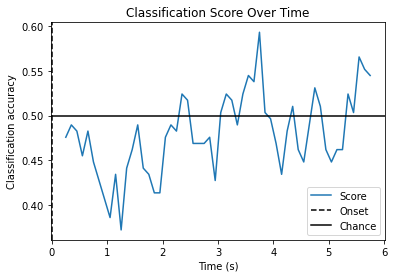

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1501 original time points ...
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1.6e-06 (2.2e-16 eps * 4 dim * 1.8e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.6e-06 (2.2e-16 eps * 4 dim * 1.8e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


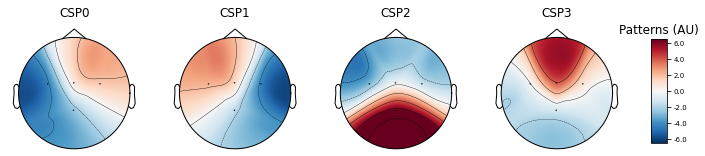

Computing rank from data with rank=None
    Using tolerance 8.1e-07 (2.2e-16 eps * 4 dim * 9.1e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.5e-07 (2.2e-16 eps * 4 dim * 9.5e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.2e-07 (2.2e-16 eps * 4 dim * 9.2e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.3e-07 (2.2e-16 eps * 4 dim * 9.3e+08  max singular value)
    Estimated rank 

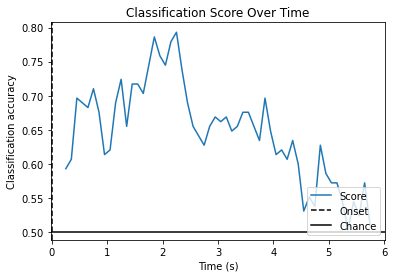

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1501 original time points ...
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 9.8e-07 (2.2e-16 eps * 4 dim * 1.1e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.1e-06 (2.2e-16 eps * 4 dim * 1.2e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


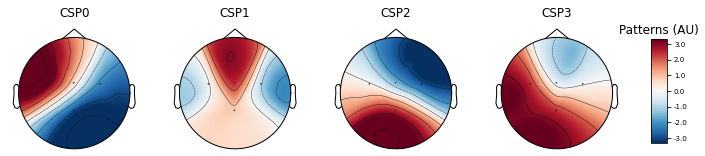

Computing rank from data with rank=None
    Using tolerance 5.9e-07 (2.2e-16 eps * 4 dim * 6.7e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.2e-07 (2.2e-16 eps * 4 dim * 7e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.9e-07 (2.2e-16 eps * 4 dim * 6.6e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6e-07 (2.2e-16 eps * 4 dim * 6.7e+08  max singular value)
    Estimated rank (mag

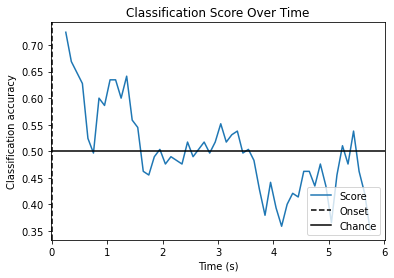

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1501 original time points ...
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 2.1e-06 (2.2e-16 eps * 4 dim * 2.4e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.2e-06 (2.2e-16 eps * 4 dim * 2.5e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


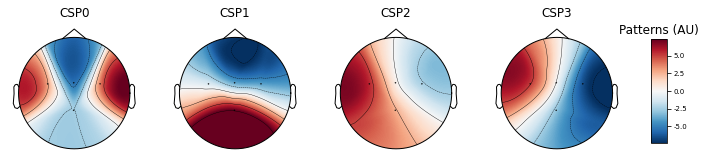

Computing rank from data with rank=None
    Using tolerance 1.3e-06 (2.2e-16 eps * 4 dim * 1.4e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.4e-06 (2.2e-16 eps * 4 dim * 1.5e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.3e-06 (2.2e-16 eps * 4 dim * 1.5e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.3e-06 (2.2e-16 eps * 4 dim * 1.5e+09  max singular value)
    Estimated rank 

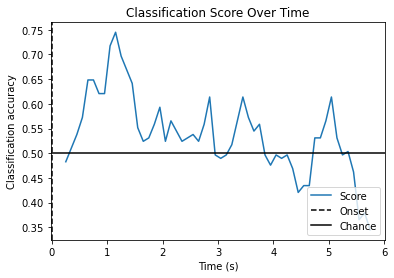

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1501 original time points ...
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1.6e-06 (2.2e-16 eps * 4 dim * 1.8e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.6e-06 (2.2e-16 eps * 4 dim * 1.8e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


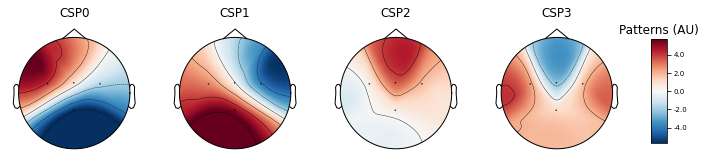

Computing rank from data with rank=None
    Using tolerance 7.2e-07 (2.2e-16 eps * 4 dim * 8.1e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.3e-07 (2.2e-16 eps * 4 dim * 8.2e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.3e-07 (2.2e-16 eps * 4 dim * 8.2e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.2e-07 (2.2e-16 eps * 4 dim * 8.1e+08  max singular value)
    Estimated rank 

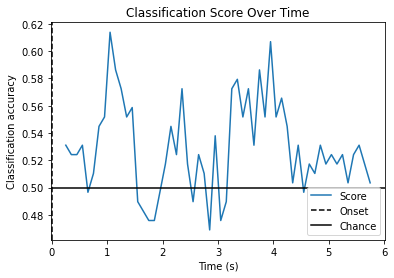

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1501 original time points ...
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1.9e-06 (2.2e-16 eps * 4 dim * 2.2e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2e-06 (2.2e-16 eps * 4 dim * 2.2e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


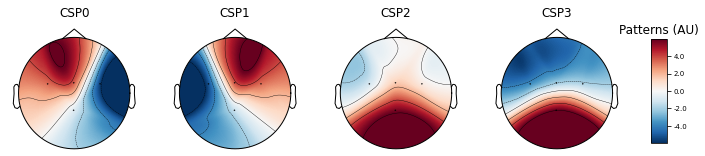

Computing rank from data with rank=None
    Using tolerance 1.1e-06 (2.2e-16 eps * 4 dim * 1.3e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-06 (2.2e-16 eps * 4 dim * 1.3e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.1e-06 (2.2e-16 eps * 4 dim * 1.2e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-06 (2.2e-16 eps * 4 dim * 1.3e+09  max singular value)
    Estimated rank 

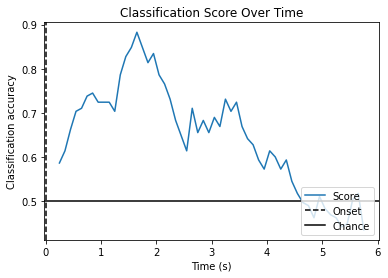

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1501 original time points ...
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 2.7e-06 (2.2e-16 eps * 4 dim * 3e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.7e-06 (2.2e-16 eps * 4 dim * 3.1e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


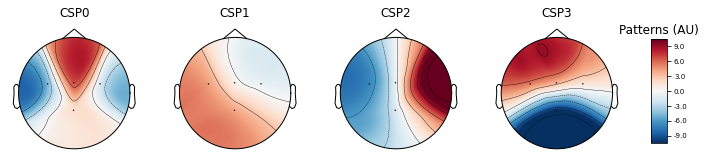

Computing rank from data with rank=None
    Using tolerance 1.5e-06 (2.2e-16 eps * 4 dim * 1.7e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.7e-06 (2.2e-16 eps * 4 dim * 1.9e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.5e-06 (2.2e-16 eps * 4 dim * 1.7e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.5e-06 (2.2e-16 eps * 4 dim * 1.7e+09  max singular value)
    Estimated rank 

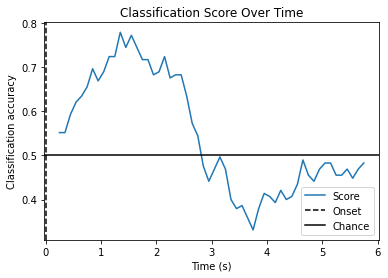

In [19]:
# Create new pipeline with cross_val_score function

results_LeftRight = []
LeftRight_means = []

for raw in raw_list:
    # Standardizing
    standardize(raw)
    
    # Filtering events to look at only left and right
    events, _ = events_from_annotations(raw)
    events = filterLeftRight(events)
    
    # Creating filter
    picks = pick_types(raw.info, meg = False, eeg = True, stim = False, eog = False, exclude = exclude)
    
    # Epoching data
    event_id = dict(leftHand = 7, rightHand = 8)
    epochs, epochs_train = createEpochs(raw, events)
    
    # Splitting testing data + cross-validate
    epochs_data, epochs_data_train, cv, cv_split, labels = crossValidation(epochs, epochs_train)
    
    # CSP begins
    csp = plotCSP(epochs_data, labels)
    
    # Creating pipeline, LDA + printing score results
    lda = LDA()
    clf = Pipeline([('CSP', csp), ('LDA', lda)])
    
    scores = fillScores(clf, epochs_data_train, labels, cv)
    results_LeftRight.append(printResults(labels, scores))
    LeftRight_means.append(np.mean(scores))
    
    # ACCURACY
    sfreq = raw.info['sfreq']
    w_length = int(sfreq * 0.5)
    w_step = int(sfreq * 0.1)
    w_start = np.arange(0, epochs_data.shape[2] - w_length, w_step)
    
    scores_windows = []
    
    for train_idx, test_idx in cv_split:
        y_train, y_test = labels[train_idx], labels[test_idx]
        
        # Filling training and testing sets
        x_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
        x_test = csp.transform(epochs_data_train[test_idx])
        
        # Fit classifier
        lda.fit(x_train, y_train)
        
        # Running classifier
        score_current_window = []
        for n in w_start:
            x_test = csp.transform(epochs_data[test_idx][:, :, n:(n + w_length)])
            score_current_window.append(lda.score(x_test, y_test))
        
        scores_windows.append(score_current_window)
    
    # Plotting LDA figures
    w_times = (w_start + w_length / 2.) / sfreq + epochs.tmin
    
    plt.figure()
    plt.plot(w_times, np.mean(scores_windows, 0), label = 'Score')
    plt.axvline(0, linestyle = '--', color = 'k', label = 'Onset')
    plt.axhline(0.5, linestyle = '-', color = 'k', label = 'Chance')
    plt.xlabel('Time (s)')
    plt.ylabel('Classification accuracy')
    plt.title('Classification Score Over Time')
    plt.legend(loc = 'lower right')
    plt.show()

In [20]:
print(results_LeftRight)

['LDA Classification accuracy: 0.558621 / Chance level: 0.503497', 'LDA Classification accuracy: 0.489655 / Chance level: 0.500000', 'LDA Classification accuracy: 0.820690 / Chance level: 0.500000', 'LDA Classification accuracy: 0.517241 / Chance level: 0.500000', 'LDA Classification accuracy: 0.579310 / Chance level: 0.500000', 'LDA Classification accuracy: 0.648276 / Chance level: 0.500000', 'LDA Classification accuracy: 0.868966 / Chance level: 0.500000', 'LDA Classification accuracy: 0.627586 / Chance level: 0.500000']


### Left and Foot

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1501 original time points ...
1 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1.3e-06 (2.2e-16 eps * 4 dim * 1.4e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.4e-06 (2.2e-16 eps * 4 dim * 1.6e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


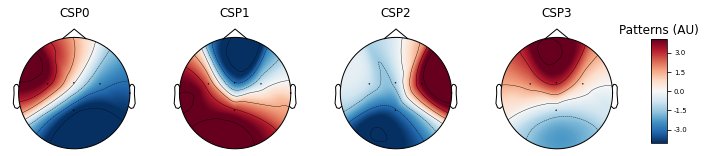

Computing rank from data with rank=None
    Using tolerance 7.4e-07 (2.2e-16 eps * 4 dim * 8.4e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.7e-07 (2.2e-16 eps * 4 dim * 9.8e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.7e-07 (2.2e-16 eps * 4 dim * 8.6e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.5e-07 (2.2e-16 eps * 4 dim * 9.6e+08  max singular value)
    Estimated rank 

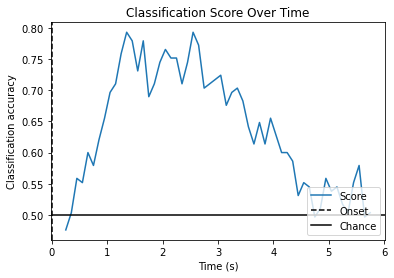

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1501 original time points ...
1 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1.2e-06 (2.2e-16 eps * 4 dim * 1.3e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-06 (2.2e-16 eps * 4 dim * 1.4e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


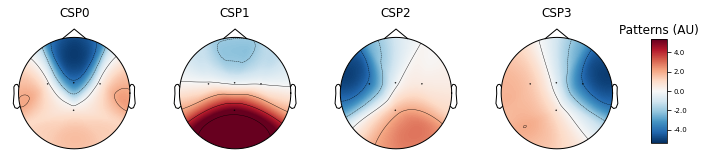

Computing rank from data with rank=None
    Using tolerance 6.4e-07 (2.2e-16 eps * 4 dim * 7.2e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.5e-07 (2.2e-16 eps * 4 dim * 7.3e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.5e-07 (2.2e-16 eps * 4 dim * 7.3e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.4e-07 (2.2e-16 eps * 4 dim * 7.2e+08  max singular value)
    Estimated rank 

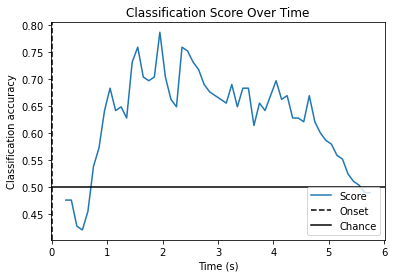

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1501 original time points ...
1 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1.6e-06 (2.2e-16 eps * 4 dim * 1.8e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.6e-06 (2.2e-16 eps * 4 dim * 1.8e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


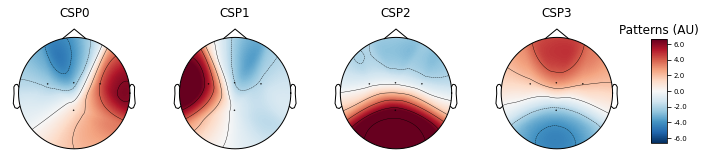

Computing rank from data with rank=None
    Using tolerance 8e-07 (2.2e-16 eps * 4 dim * 9e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9.4e-07 (2.2e-16 eps * 4 dim * 1.1e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.2e-07 (2.2e-16 eps * 4 dim * 9.2e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9.2e-07 (2.2e-16 eps * 4 dim * 1e+09  max singular value)
    Estimated rank (mag):

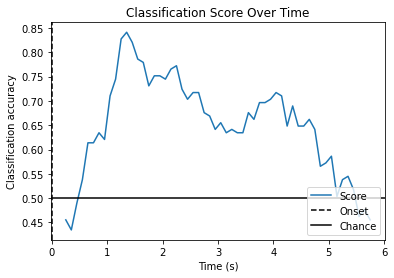

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1501 original time points ...
1 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 9.8e-07 (2.2e-16 eps * 4 dim * 1.1e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.1e-06 (2.2e-16 eps * 4 dim * 1.2e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


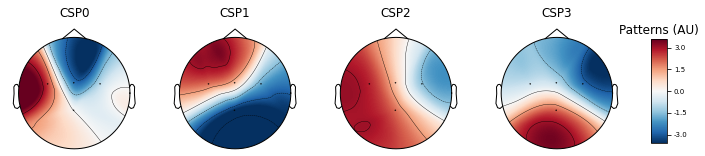

Computing rank from data with rank=None
    Using tolerance 5.8e-07 (2.2e-16 eps * 4 dim * 6.5e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.2e-07 (2.2e-16 eps * 4 dim * 7e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.9e-07 (2.2e-16 eps * 4 dim * 6.6e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.2e-07 (2.2e-16 eps * 4 dim * 7e+08  max singular value)
    Estimated rank (mag

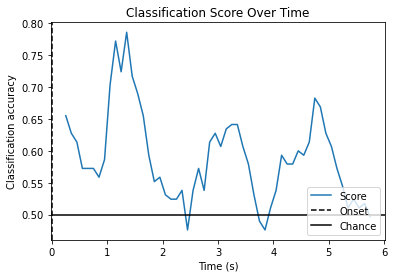

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1501 original time points ...
1 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 2.1e-06 (2.2e-16 eps * 4 dim * 2.4e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.2e-06 (2.2e-16 eps * 4 dim * 2.5e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


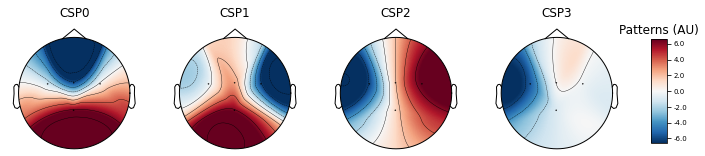

Computing rank from data with rank=None
    Using tolerance 1.2e-06 (2.2e-16 eps * 4 dim * 1.4e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.5e-06 (2.2e-16 eps * 4 dim * 1.7e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-06 (2.2e-16 eps * 4 dim * 1.3e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.5e-06 (2.2e-16 eps * 4 dim * 1.7e+09  max singular value)
    Estimated rank 

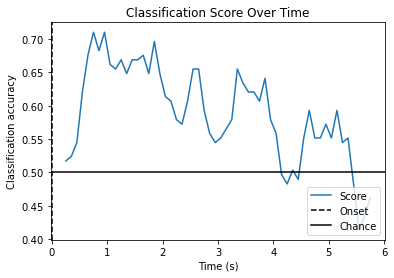

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1501 original time points ...
1 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1.6e-06 (2.2e-16 eps * 4 dim * 1.8e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.6e-06 (2.2e-16 eps * 4 dim * 1.8e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


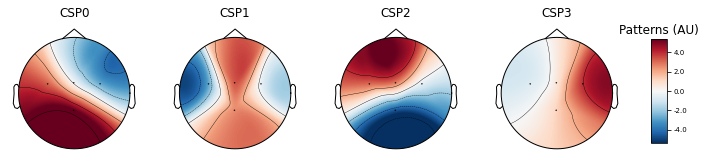

Computing rank from data with rank=None
    Using tolerance 7.1e-07 (2.2e-16 eps * 4 dim * 8e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.7e-07 (2.2e-16 eps * 4 dim * 8.6e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.1e-07 (2.2e-16 eps * 4 dim * 8e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.5e-07 (2.2e-16 eps * 4 dim * 8.5e+08  max singular value)
    Estimated rank (mag

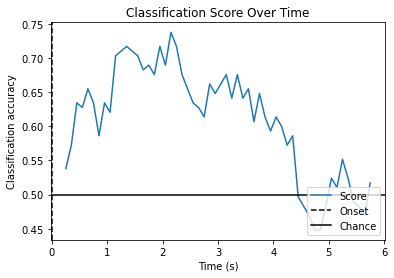

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1501 original time points ...
1 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1.9e-06 (2.2e-16 eps * 4 dim * 2.2e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.9e-06 (2.2e-16 eps * 4 dim * 2.1e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


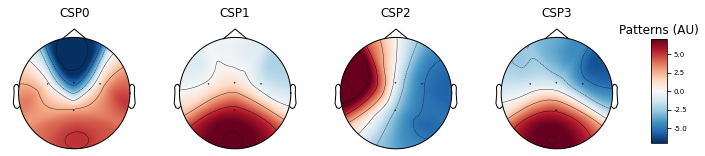

Computing rank from data with rank=None
    Using tolerance 1.1e-06 (2.2e-16 eps * 4 dim * 1.2e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.1e-06 (2.2e-16 eps * 4 dim * 1.3e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-06 (2.2e-16 eps * 4 dim * 1.3e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.1e-06 (2.2e-16 eps * 4 dim * 1.3e+09  max singular value)
    Estimated rank 

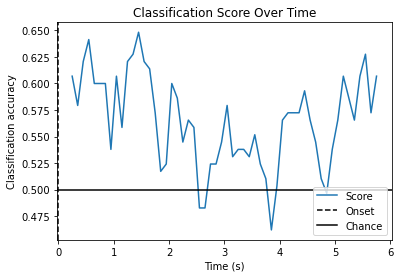

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1501 original time points ...
1 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 2.7e-06 (2.2e-16 eps * 4 dim * 3e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.8e-06 (2.2e-16 eps * 4 dim * 3.1e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


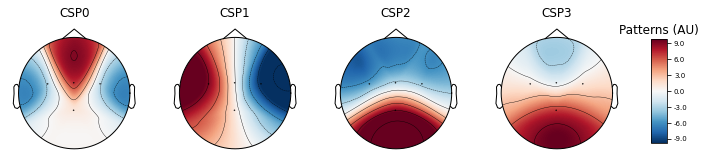

Computing rank from data with rank=None
    Using tolerance 1.5e-06 (2.2e-16 eps * 4 dim * 1.7e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.7e-06 (2.2e-16 eps * 4 dim * 2e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.4e-06 (2.2e-16 eps * 4 dim * 1.6e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.8e-06 (2.2e-16 eps * 4 dim * 2.1e+09  max singular value)
    Estimated rank (m

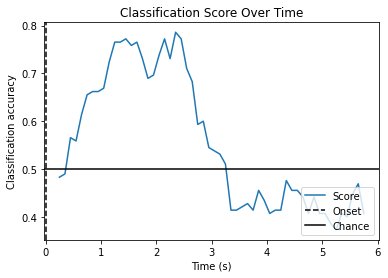

In [21]:
# Create new pipeline with cross_val_score function

results_LeftFoot = []
LeftFoot_means = []

for raw in raw_list:
    # Standardizing
    standardize(raw)
    
    # Filtering events to look at only left and right
    events, _ = events_from_annotations(raw)
    events = filterLeftFoot(events)
    
    # Creating filter
    picks = pick_types(raw.info, meg = False, eeg = True, stim = False, eog = False, exclude = exclude)
    
    # Epoching data
    event_id = dict(leftHand = 7, foot = 9)
    epochs, epochs_train = createEpochs(raw, events)
    
    # Splitting testing data + cross-validate
    epochs_data, epochs_data_train, cv, cv_split, labels = crossValidation(epochs, epochs_train)
    
    # CSP begins
    csp = plotCSP(epochs_data, labels)
    
    # Creating pipeline, LDA + printing score results
    lda = LDA()
    clf = Pipeline([('CSP', csp), ('LDA', lda)])
    
    scores = fillScores(clf, epochs_data_train, labels, cv)
    results_LeftFoot.append(printResults(labels, scores))
    LeftFoot_means.append(np.mean(scores))
    
    # ACCURACY
    sfreq = raw.info['sfreq']
    w_length = int(sfreq * 0.5)
    w_step = int(sfreq * 0.1)
    w_start = np.arange(0, epochs_data.shape[2] - w_length, w_step)
    
    scores_windows = []
    
    for train_idx, test_idx in cv_split:
        y_train, y_test = labels[train_idx], labels[test_idx]
        
        # Filling training and testing sets
        x_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
        x_test = csp.transform(epochs_data_train[test_idx])
        
        # Fit classifier
        lda.fit(x_train, y_train)
        
        # Running classifier
        score_current_window = []
        for n in w_start:
            x_test = csp.transform(epochs_data[test_idx][:, :, n:(n + w_length)])
            score_current_window.append(lda.score(x_test, y_test))
        
        scores_windows.append(score_current_window)
    
    # Plotting LDA figures
    w_times = (w_start + w_length / 2.) / sfreq + epochs.tmin
    
    plt.figure()
    plt.plot(w_times, np.mean(scores_windows, 0), label = 'Score')
    plt.axvline(0, linestyle = '--', color = 'k', label = 'Onset')
    plt.axhline(0.5, linestyle = '-', color = 'k', label = 'Chance')
    plt.xlabel('Time (s)')
    plt.ylabel('Classification accuracy')
    plt.title('Classification Score Over Time')
    plt.legend(loc = 'lower right')
    plt.show()

In [22]:
print(results_LeftFoot)

['LDA Classification accuracy: 0.862069 / Chance level: 0.503497', 'LDA Classification accuracy: 0.827586 / Chance level: 0.503497', 'LDA Classification accuracy: 0.834483 / Chance level: 0.503497', 'LDA Classification accuracy: 0.717241 / Chance level: 0.503497', 'LDA Classification accuracy: 0.696552 / Chance level: 0.503497', 'LDA Classification accuracy: 0.765517 / Chance level: 0.503497', 'LDA Classification accuracy: 0.579310 / Chance level: 0.503497', 'LDA Classification accuracy: 0.648276 / Chance level: 0.503497']


### Left and Tongue

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1501 original time points ...
1 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1.3e-06 (2.2e-16 eps * 4 dim * 1.4e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.4e-06 (2.2e-16 eps * 4 dim * 1.6e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


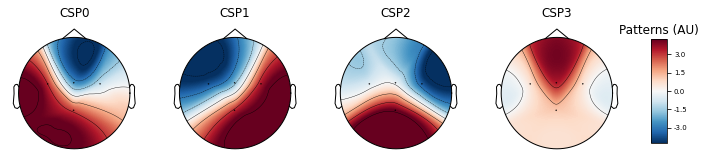

Computing rank from data with rank=None
    Using tolerance 7.4e-07 (2.2e-16 eps * 4 dim * 8.3e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9.2e-07 (2.2e-16 eps * 4 dim * 1e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.7e-07 (2.2e-16 eps * 4 dim * 8.7e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9e-07 (2.2e-16 eps * 4 dim * 1e+09  max singular value)
    Estimated rank (mag):

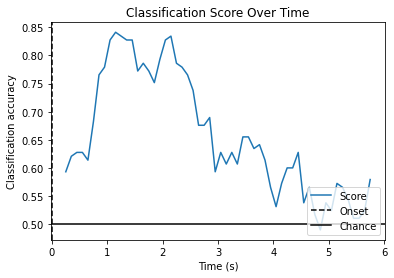

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1501 original time points ...
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1.2e-06 (2.2e-16 eps * 4 dim * 1.3e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-06 (2.2e-16 eps * 4 dim * 1.4e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


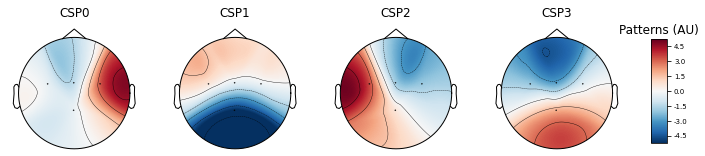

Computing rank from data with rank=None
    Using tolerance 6.3e-07 (2.2e-16 eps * 4 dim * 7.1e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.5e-07 (2.2e-16 eps * 4 dim * 7.4e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.4e-07 (2.2e-16 eps * 4 dim * 7.2e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.3e-07 (2.2e-16 eps * 4 dim * 7.1e+08  max singular value)
    Estimated rank 

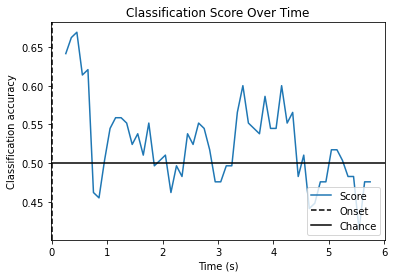

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1501 original time points ...
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1.6e-06 (2.2e-16 eps * 4 dim * 1.8e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.8e-06 (2.2e-16 eps * 4 dim * 2e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


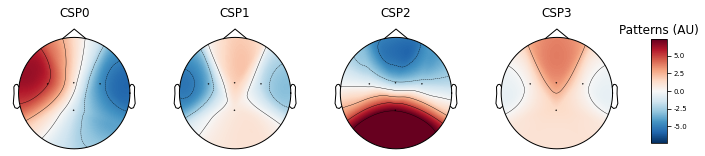

Computing rank from data with rank=None
    Using tolerance 7.9e-07 (2.2e-16 eps * 4 dim * 8.9e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1e-06 (2.2e-16 eps * 4 dim * 1.2e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.1e-07 (2.2e-16 eps * 4 dim * 9.1e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1e-06 (2.2e-16 eps * 4 dim * 1.1e+09  max singular value)
    Estimated rank (mag

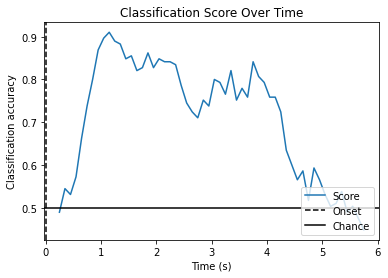

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1501 original time points ...
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 9.8e-07 (2.2e-16 eps * 4 dim * 1.1e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9.9e-07 (2.2e-16 eps * 4 dim * 1.1e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


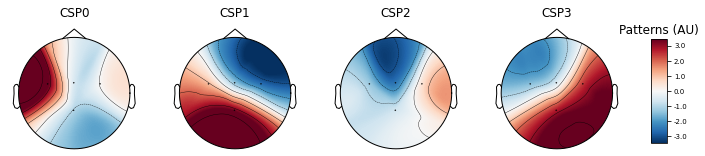

Computing rank from data with rank=None
    Using tolerance 5.7e-07 (2.2e-16 eps * 4 dim * 6.4e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.3e-07 (2.2e-16 eps * 4 dim * 7e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.8e-07 (2.2e-16 eps * 4 dim * 6.6e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.2e-07 (2.2e-16 eps * 4 dim * 7e+08  max singular value)
    Estimated rank (mag

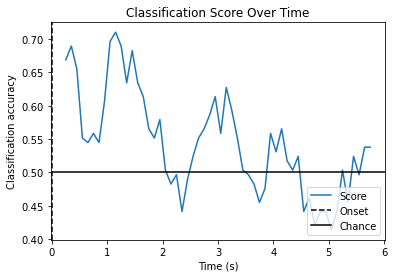

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1501 original time points ...
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 2.1e-06 (2.2e-16 eps * 4 dim * 2.4e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.3e-06 (2.2e-16 eps * 4 dim * 2.5e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


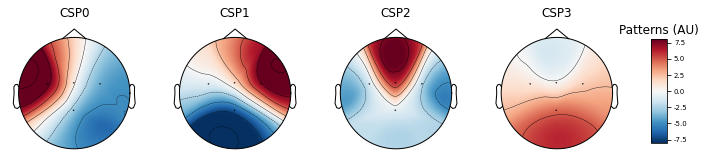

Computing rank from data with rank=None
    Using tolerance 1.3e-06 (2.2e-16 eps * 4 dim * 1.5e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.4e-06 (2.2e-16 eps * 4 dim * 1.6e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.3e-06 (2.2e-16 eps * 4 dim * 1.4e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.4e-06 (2.2e-16 eps * 4 dim * 1.6e+09  max singular value)
    Estimated rank 

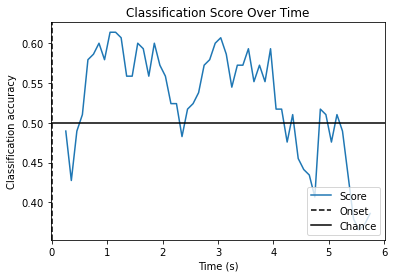

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1501 original time points ...
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1.6e-06 (2.2e-16 eps * 4 dim * 1.8e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.6e-06 (2.2e-16 eps * 4 dim * 1.8e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


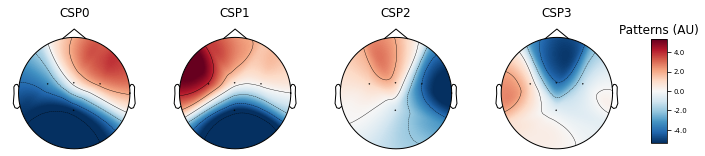

Computing rank from data with rank=None
    Using tolerance 7e-07 (2.2e-16 eps * 4 dim * 7.9e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.6e-07 (2.2e-16 eps * 4 dim * 9.7e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.2e-07 (2.2e-16 eps * 4 dim * 8.1e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.6e-07 (2.2e-16 eps * 4 dim * 9.7e+08  max singular value)
    Estimated rank (m

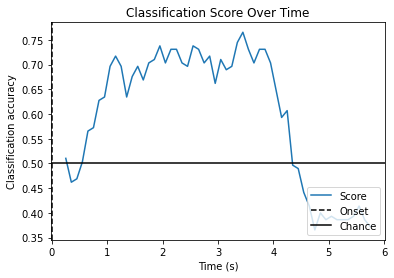

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1501 original time points ...
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1.9e-06 (2.2e-16 eps * 4 dim * 2.2e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.3e-06 (2.2e-16 eps * 4 dim * 2.6e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


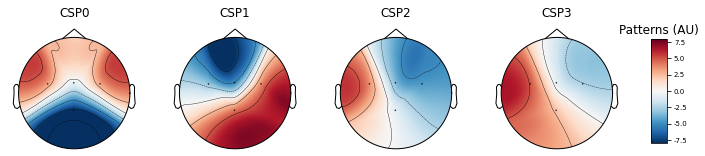

Computing rank from data with rank=None
    Using tolerance 1.1e-06 (2.2e-16 eps * 4 dim * 1.2e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.5e-06 (2.2e-16 eps * 4 dim * 1.6e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.1e-06 (2.2e-16 eps * 4 dim * 1.2e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.4e-06 (2.2e-16 eps * 4 dim * 1.6e+09  max singular value)
    Estimated rank 

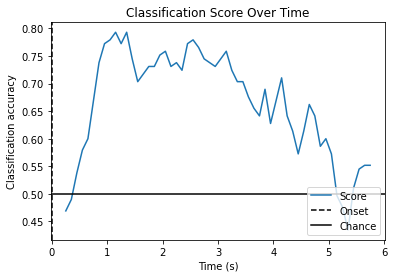

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1501 original time points ...
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 2.7e-06 (2.2e-16 eps * 4 dim * 3e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3e-06 (2.2e-16 eps * 4 dim * 3.4e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


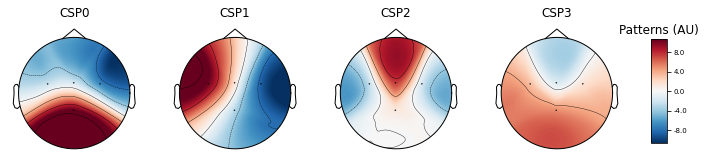

Computing rank from data with rank=None
    Using tolerance 1.5e-06 (2.2e-16 eps * 4 dim * 1.7e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.9e-06 (2.2e-16 eps * 4 dim * 2.1e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.5e-06 (2.2e-16 eps * 4 dim * 1.7e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.9e-06 (2.2e-16 eps * 4 dim * 2.1e+09  max singular value)
    Estimated rank 

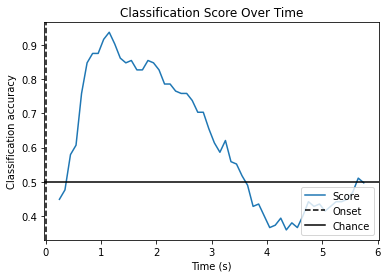

In [23]:
# Create new pipeline with cross_val_score function

results_LeftTongue = []
LeftTongue_means = []

for raw in raw_list:
    # Standardizing
    standardize(raw)
    
    # Filtering events to look at only left and right
    events, _ = events_from_annotations(raw)
    events = filterLeftTongue(events)
    
    # Creating filter
    picks = pick_types(raw.info, meg = False, eeg = True, stim = False, eog = False, exclude = exclude)
    
    # Epoching data
    event_id = dict(leftHand = 7, tongue = 10)
    epochs, epochs_train = createEpochs(raw, events)
    
    # Splitting testing data + cross-validate
    epochs_data, epochs_data_train, cv, cv_split, labels = crossValidation(epochs, epochs_train)
    
    # CSP begins
    csp = plotCSP(epochs_data, labels)
    
    # Creating pipeline, LDA + printing score results
    lda = LDA()
    clf = Pipeline([('CSP', csp), ('LDA', lda)])
    
    scores = fillScores(clf, epochs_data_train, labels, cv)
    results_LeftTongue.append(printResults(labels, scores))
    LeftTongue_means.append(np.mean(scores))
    
    # ACCURACY
    sfreq = raw.info['sfreq']
    w_length = int(sfreq * 0.5)
    w_step = int(sfreq * 0.1)
    w_start = np.arange(0, epochs_data.shape[2] - w_length, w_step)
    
    scores_windows = []
    
    for train_idx, test_idx in cv_split:
        y_train, y_test = labels[train_idx], labels[test_idx]
        
        # Filling training and testing sets
        x_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
        x_test = csp.transform(epochs_data_train[test_idx])
        
        # Fit classifier
        lda.fit(x_train, y_train)
        
        # Running classifier
        score_current_window = []
        for n in w_start:
            x_test = csp.transform(epochs_data[test_idx][:, :, n:(n + w_length)])
            score_current_window.append(lda.score(x_test, y_test))
        
        scores_windows.append(score_current_window)
    
    # Plotting LDA figures
    w_times = (w_start + w_length / 2.) / sfreq + epochs.tmin
    
    plt.figure()
    plt.plot(w_times, np.mean(scores_windows, 0), label = 'Score')
    plt.axvline(0, linestyle = '--', color = 'k', label = 'Onset')
    plt.axhline(0.5, linestyle = '-', color = 'k', label = 'Chance')
    plt.xlabel('Time (s)')
    plt.ylabel('Classification accuracy')
    plt.title('Classification Score Over Time')
    plt.legend(loc = 'lower right')
    plt.show()

In [24]:
print(results_LeftTongue)

['LDA Classification accuracy: 0.882759 / Chance level: 0.503497', 'LDA Classification accuracy: 0.593103 / Chance level: 0.500000', 'LDA Classification accuracy: 0.924138 / Chance level: 0.500000', 'LDA Classification accuracy: 0.634483 / Chance level: 0.500000', 'LDA Classification accuracy: 0.600000 / Chance level: 0.500000', 'LDA Classification accuracy: 0.862069 / Chance level: 0.500000', 'LDA Classification accuracy: 0.862069 / Chance level: 0.500000', 'LDA Classification accuracy: 0.834483 / Chance level: 0.500000']


### Right and Foot

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1501 original time points ...
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1.3e-06 (2.2e-16 eps * 4 dim * 1.4e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.4e-06 (2.2e-16 eps * 4 dim * 1.6e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


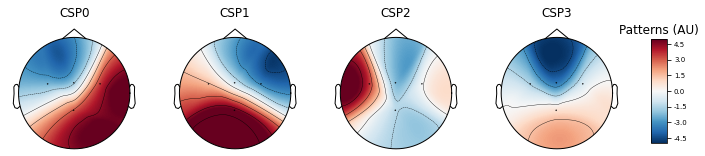

Computing rank from data with rank=None
    Using tolerance 7.5e-07 (2.2e-16 eps * 4 dim * 8.4e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.7e-07 (2.2e-16 eps * 4 dim * 9.8e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.5e-07 (2.2e-16 eps * 4 dim * 8.4e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.6e-07 (2.2e-16 eps * 4 dim * 9.7e+08  max singular value)
    Estimated rank 

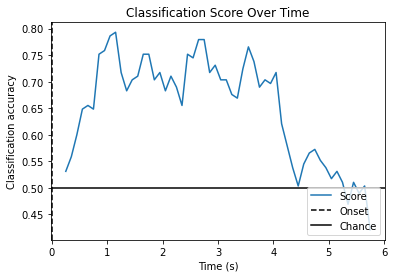

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1501 original time points ...
1 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1.2e-06 (2.2e-16 eps * 4 dim * 1.4e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-06 (2.2e-16 eps * 4 dim * 1.4e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


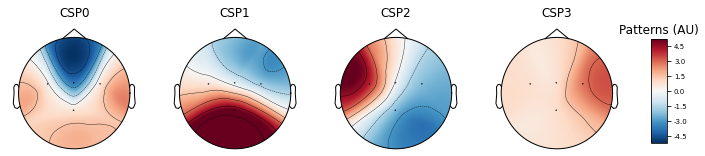

Computing rank from data with rank=None
    Using tolerance 6.6e-07 (2.2e-16 eps * 4 dim * 7.5e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.3e-07 (2.2e-16 eps * 4 dim * 7.1e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.6e-07 (2.2e-16 eps * 4 dim * 7.5e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.4e-07 (2.2e-16 eps * 4 dim * 7.3e+08  max singular value)
    Estimated rank 

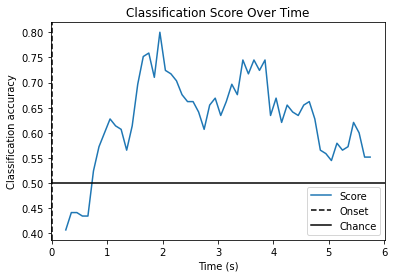

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1501 original time points ...
1 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1.6e-06 (2.2e-16 eps * 4 dim * 1.8e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.6e-06 (2.2e-16 eps * 4 dim * 1.8e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


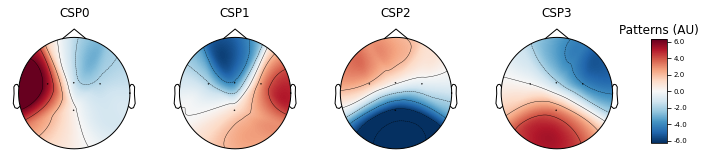

Computing rank from data with rank=None
    Using tolerance 8.4e-07 (2.2e-16 eps * 4 dim * 9.4e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9.1e-07 (2.2e-16 eps * 4 dim * 1e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.1e-07 (2.2e-16 eps * 4 dim * 9.2e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9.2e-07 (2.2e-16 eps * 4 dim * 1e+09  max singular value)
    Estimated rank (mag

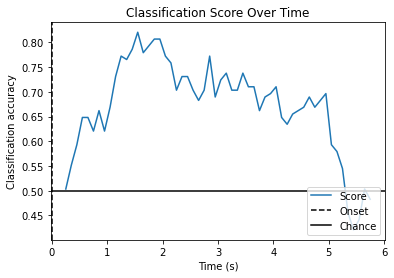

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1501 original time points ...
1 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1.1e-06 (2.2e-16 eps * 4 dim * 1.2e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.1e-06 (2.2e-16 eps * 4 dim * 1.2e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


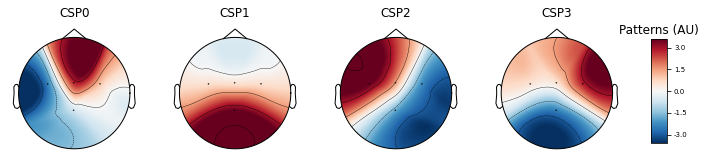

Computing rank from data with rank=None
    Using tolerance 6.4e-07 (2.2e-16 eps * 4 dim * 7.2e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.2e-07 (2.2e-16 eps * 4 dim * 6.9e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.1e-07 (2.2e-16 eps * 4 dim * 6.9e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.1e-07 (2.2e-16 eps * 4 dim * 6.9e+08  max singular value)
    Estimated rank 

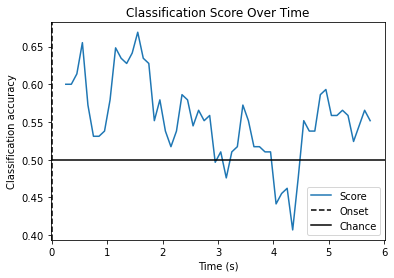

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1501 original time points ...
1 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 2.2e-06 (2.2e-16 eps * 4 dim * 2.5e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.2e-06 (2.2e-16 eps * 4 dim * 2.5e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


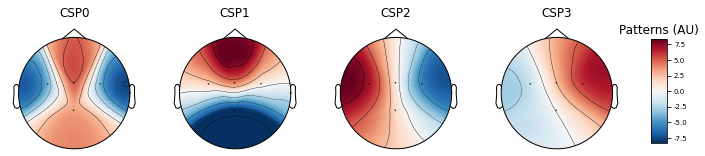

Computing rank from data with rank=None
    Using tolerance 1.3e-06 (2.2e-16 eps * 4 dim * 1.5e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.4e-06 (2.2e-16 eps * 4 dim * 1.6e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.3e-06 (2.2e-16 eps * 4 dim * 1.5e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.4e-06 (2.2e-16 eps * 4 dim * 1.6e+09  max singular value)
    Estimated rank 

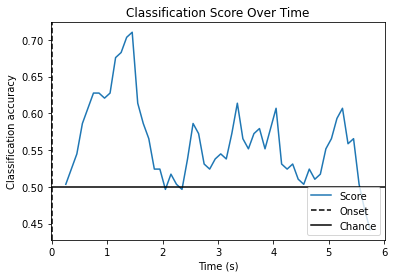

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1501 original time points ...
1 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1.6e-06 (2.2e-16 eps * 4 dim * 1.8e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.6e-06 (2.2e-16 eps * 4 dim * 1.8e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


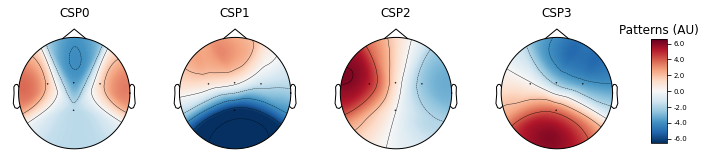

Computing rank from data with rank=None
    Using tolerance 7.3e-07 (2.2e-16 eps * 4 dim * 8.2e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.5e-07 (2.2e-16 eps * 4 dim * 8.5e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.3e-07 (2.2e-16 eps * 4 dim * 8.2e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.6e-07 (2.2e-16 eps * 4 dim * 8.6e+08  max singular value)
    Estimated rank 

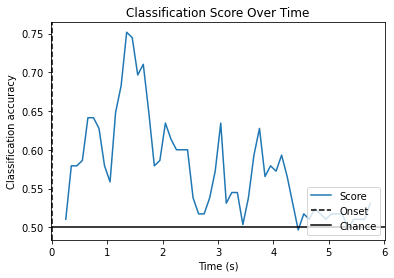

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1501 original time points ...
1 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 2e-06 (2.2e-16 eps * 4 dim * 2.2e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.9e-06 (2.2e-16 eps * 4 dim * 2.1e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


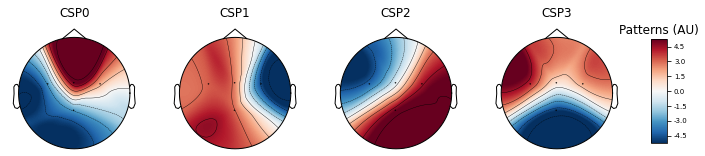

Computing rank from data with rank=None
    Using tolerance 1.2e-06 (2.2e-16 eps * 4 dim * 1.3e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.1e-06 (2.2e-16 eps * 4 dim * 1.3e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-06 (2.2e-16 eps * 4 dim * 1.3e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.1e-06 (2.2e-16 eps * 4 dim * 1.2e+09  max singular value)
    Estimated rank 

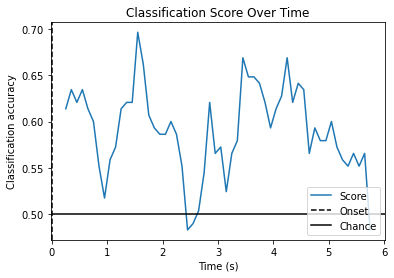

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1501 original time points ...
1 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 2.7e-06 (2.2e-16 eps * 4 dim * 3.1e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.8e-06 (2.2e-16 eps * 4 dim * 3.1e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


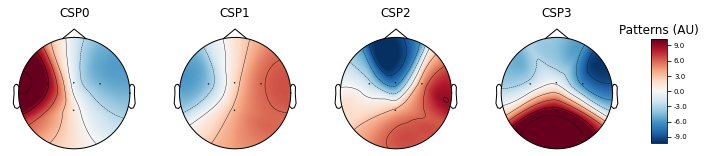

Computing rank from data with rank=None
    Using tolerance 1.7e-06 (2.2e-16 eps * 4 dim * 1.9e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.7e-06 (2.2e-16 eps * 4 dim * 1.9e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.6e-06 (2.2e-16 eps * 4 dim * 1.8e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.7e-06 (2.2e-16 eps * 4 dim * 1.9e+09  max singular value)
    Estimated rank 

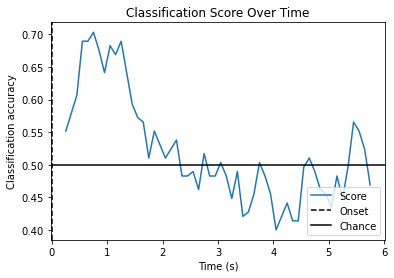

In [25]:
# Create new pipeline with cross_val_score function

results_RightFoot = []
RightFoot_means = []

for raw in raw_list:
    # Standardizing
    standardize(raw)
    
    # Filtering events to look at only left and right
    events, _ = events_from_annotations(raw)
    events = filterRightFoot(events)
    
    # Creating filter
    picks = pick_types(raw.info, meg = False, eeg = True, stim = False, eog = False, exclude = exclude)
    
    # Epoching data
    event_id = dict(rightHand = 8, foot = 9)
    epochs, epochs_train = createEpochs(raw, events)
    
    # Splitting testing data + cross-validate
    epochs_data, epochs_data_train, cv, cv_split, labels = crossValidation(epochs, epochs_train)
    
    # CSP begins
    csp = plotCSP(epochs_data, labels)
    
    # Creating pipeline, LDA + printing score results
    lda = LDA()
    clf = Pipeline([('CSP', csp), ('LDA', lda)])
    
    scores = fillScores(clf, epochs_data_train, labels, cv)
    results_RightFoot.append(printResults(labels, scores))
    RightFoot_means.append(np.mean(scores))
    
    # ACCURACY
    sfreq = raw.info['sfreq']
    w_length = int(sfreq * 0.5)
    w_step = int(sfreq * 0.1)
    w_start = np.arange(0, epochs_data.shape[2] - w_length, w_step)
    
    scores_windows = []
    
    for train_idx, test_idx in cv_split:
        y_train, y_test = labels[train_idx], labels[test_idx]
        
        # Filling training and testing sets
        x_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
        x_test = csp.transform(epochs_data_train[test_idx])
        
        # Fit classifier
        lda.fit(x_train, y_train)
        
        # Running classifier
        score_current_window = []
        for n in w_start:
            x_test = csp.transform(epochs_data[test_idx][:, :, n:(n + w_length)])
            score_current_window.append(lda.score(x_test, y_test))
        
        scores_windows.append(score_current_window)
    
    # Plotting LDA figures
    w_times = (w_start + w_length / 2.) / sfreq + epochs.tmin
    
    plt.figure()
    plt.plot(w_times, np.mean(scores_windows, 0), label = 'Score')
    plt.axvline(0, linestyle = '--', color = 'k', label = 'Onset')
    plt.axhline(0.5, linestyle = '-', color = 'k', label = 'Chance')
    plt.xlabel('Time (s)')
    plt.ylabel('Classification accuracy')
    plt.title('Classification Score Over Time')
    plt.legend(loc = 'lower right')
    plt.show()

In [26]:
print(results_RightFoot)

['LDA Classification accuracy: 0.875862 / Chance level: 0.500000', 'LDA Classification accuracy: 0.813793 / Chance level: 0.503497', 'LDA Classification accuracy: 0.882759 / Chance level: 0.503497', 'LDA Classification accuracy: 0.606897 / Chance level: 0.503497', 'LDA Classification accuracy: 0.641379 / Chance level: 0.503497', 'LDA Classification accuracy: 0.724138 / Chance level: 0.503497', 'LDA Classification accuracy: 0.696552 / Chance level: 0.503497', 'LDA Classification accuracy: 0.544828 / Chance level: 0.503497']


### Right and Tongue

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1501 original time points ...
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1.3e-06 (2.2e-16 eps * 4 dim * 1.4e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.4e-06 (2.2e-16 eps * 4 dim * 1.6e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


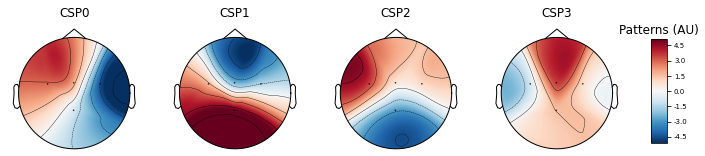

Computing rank from data with rank=None
    Using tolerance 7.4e-07 (2.2e-16 eps * 4 dim * 8.3e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9.4e-07 (2.2e-16 eps * 4 dim * 1.1e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.6e-07 (2.2e-16 eps * 4 dim * 8.5e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9e-07 (2.2e-16 eps * 4 dim * 1e+09  max singular value)
    Estimated rank (mag

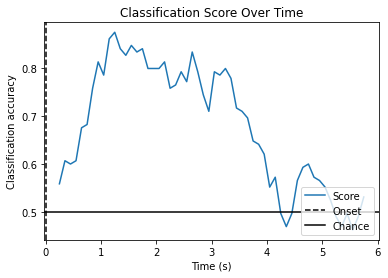

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1501 original time points ...
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1.2e-06 (2.2e-16 eps * 4 dim * 1.4e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-06 (2.2e-16 eps * 4 dim * 1.4e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


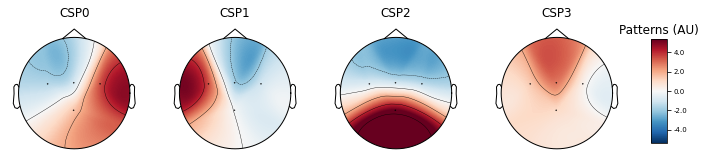

Computing rank from data with rank=None
    Using tolerance 6.6e-07 (2.2e-16 eps * 4 dim * 7.4e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.4e-07 (2.2e-16 eps * 4 dim * 7.2e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.3e-07 (2.2e-16 eps * 4 dim * 7.1e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.6e-07 (2.2e-16 eps * 4 dim * 7.4e+08  max singular value)
    Estimated rank 

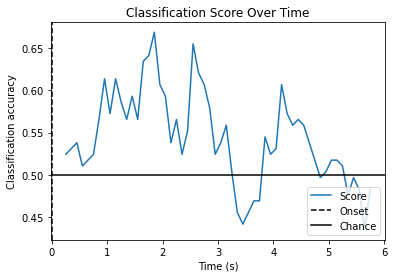

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1501 original time points ...
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1.6e-06 (2.2e-16 eps * 4 dim * 1.8e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.8e-06 (2.2e-16 eps * 4 dim * 2e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


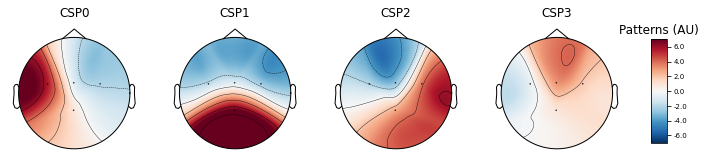

Computing rank from data with rank=None
    Using tolerance 8.4e-07 (2.2e-16 eps * 4 dim * 9.5e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1e-06 (2.2e-16 eps * 4 dim * 1.1e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.8e-07 (2.2e-16 eps * 4 dim * 8.8e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1e-06 (2.2e-16 eps * 4 dim * 1.2e+09  max singular value)
    Estimated rank (mag

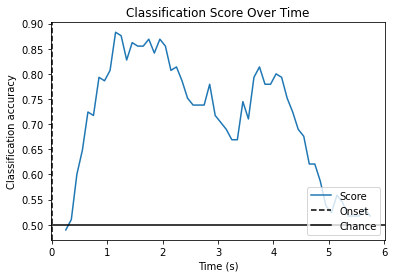

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1501 original time points ...
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1.1e-06 (2.2e-16 eps * 4 dim * 1.2e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9.9e-07 (2.2e-16 eps * 4 dim * 1.1e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


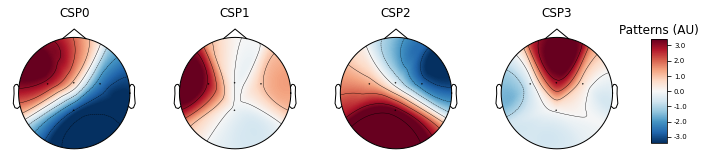

Computing rank from data with rank=None
    Using tolerance 6.3e-07 (2.2e-16 eps * 4 dim * 7.1e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.1e-07 (2.2e-16 eps * 4 dim * 6.9e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.9e-07 (2.2e-16 eps * 4 dim * 6.6e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.3e-07 (2.2e-16 eps * 4 dim * 7.1e+08  max singular value)
    Estimated rank 

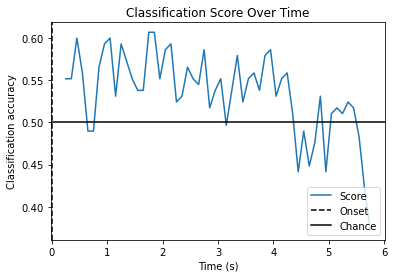

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1501 original time points ...
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 2.2e-06 (2.2e-16 eps * 4 dim * 2.5e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.3e-06 (2.2e-16 eps * 4 dim * 2.5e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


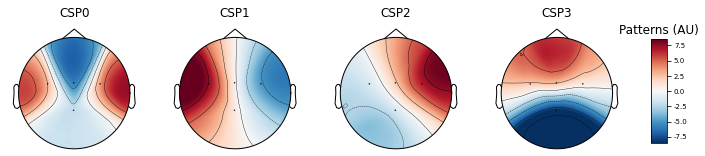

Computing rank from data with rank=None
    Using tolerance 1.4e-06 (2.2e-16 eps * 4 dim * 1.5e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.4e-06 (2.2e-16 eps * 4 dim * 1.5e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.4e-06 (2.2e-16 eps * 4 dim * 1.5e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.4e-06 (2.2e-16 eps * 4 dim * 1.6e+09  max singular value)
    Estimated rank 

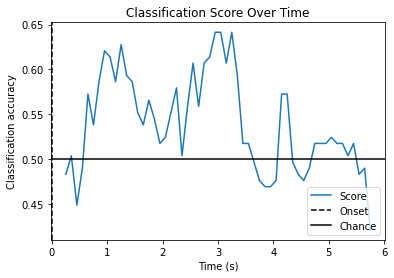

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1501 original time points ...
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1.6e-06 (2.2e-16 eps * 4 dim * 1.8e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.6e-06 (2.2e-16 eps * 4 dim * 1.8e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


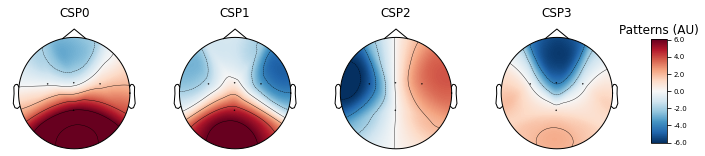

Computing rank from data with rank=None
    Using tolerance 7.3e-07 (2.2e-16 eps * 4 dim * 8.2e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.3e-07 (2.2e-16 eps * 4 dim * 9.4e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7e-07 (2.2e-16 eps * 4 dim * 7.9e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.7e-07 (2.2e-16 eps * 4 dim * 9.8e+08  max singular value)
    Estimated rank (m

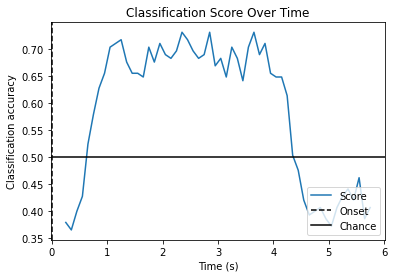

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1501 original time points ...
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 2e-06 (2.2e-16 eps * 4 dim * 2.2e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.3e-06 (2.2e-16 eps * 4 dim * 2.6e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


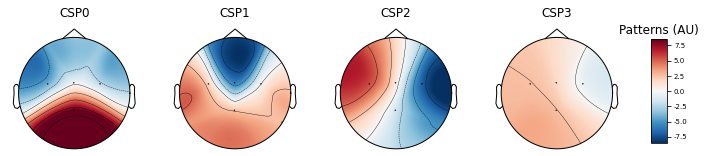

Computing rank from data with rank=None
    Using tolerance 1.1e-06 (2.2e-16 eps * 4 dim * 1.3e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.4e-06 (2.2e-16 eps * 4 dim * 1.6e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-06 (2.2e-16 eps * 4 dim * 1.3e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.5e-06 (2.2e-16 eps * 4 dim * 1.7e+09  max singular value)
    Estimated rank 

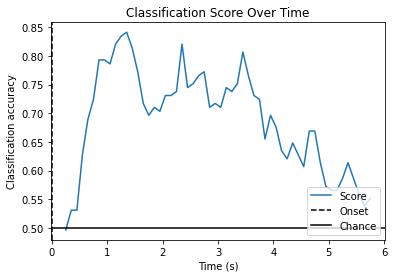

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1501 original time points ...
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 2.7e-06 (2.2e-16 eps * 4 dim * 3.1e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3e-06 (2.2e-16 eps * 4 dim * 3.4e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


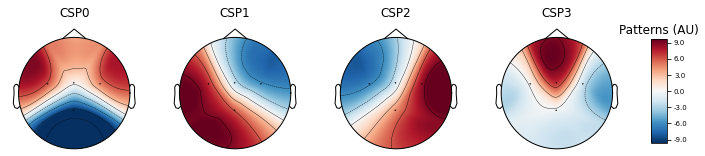

Computing rank from data with rank=None
    Using tolerance 1.6e-06 (2.2e-16 eps * 4 dim * 1.9e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.9e-06 (2.2e-16 eps * 4 dim * 2.1e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.7e-06 (2.2e-16 eps * 4 dim * 1.9e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.9e-06 (2.2e-16 eps * 4 dim * 2.1e+09  max singular value)
    Estimated rank 

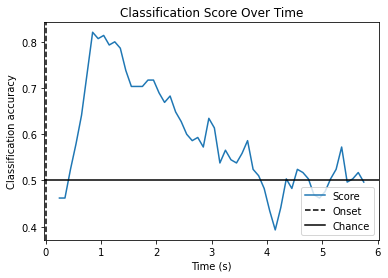

In [27]:
# Create new pipeline with cross_val_score function

results_RightTongue = []
RightTongue_means = []

for raw in raw_list:
    # Standardizing
    standardize(raw)
    
    # Filtering events to look at only left and right
    events, _ = events_from_annotations(raw)
    events = filterRightTongue(events)
    
    # Creating filter
    picks = pick_types(raw.info, meg = False, eeg = True, stim = False, eog = False, exclude = exclude)
    
    # Epoching data
    event_id = dict(rightHand = 8, tongue = 10)
    epochs, epochs_train = createEpochs(raw, events)
    
    # Splitting testing data + cross-validate
    epochs_data, epochs_data_train, cv, cv_split, labels = crossValidation(epochs, epochs_train)
    
    # CSP begins
    csp = plotCSP(epochs_data, labels)
    
    # Creating pipeline, LDA + printing score results
    lda = LDA()
    clf = Pipeline([('CSP', csp), ('LDA', lda)])
    
    scores = fillScores(clf, epochs_data_train, labels, cv)
    results_RightTongue.append(printResults(labels, scores))
    RightTongue_means.append(np.mean(scores))
    
    # ACCURACY
    sfreq = raw.info['sfreq']
    w_length = int(sfreq * 0.5)
    w_step = int(sfreq * 0.1)
    w_start = np.arange(0, epochs_data.shape[2] - w_length, w_step)
    
    scores_windows = []
    
    for train_idx, test_idx in cv_split:
        y_train, y_test = labels[train_idx], labels[test_idx]
        
        # Filling training and testing sets
        x_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
        x_test = csp.transform(epochs_data_train[test_idx])
        
        # Fit classifier
        lda.fit(x_train, y_train)
        
        # Running classifier
        score_current_window = []
        for n in w_start:
            x_test = csp.transform(epochs_data[test_idx][:, :, n:(n + w_length)])
            score_current_window.append(lda.score(x_test, y_test))
        
        scores_windows.append(score_current_window)
    
    # Plotting LDA figures
    w_times = (w_start + w_length / 2.) / sfreq + epochs.tmin
    
    plt.figure()
    plt.plot(w_times, np.mean(scores_windows, 0), label = 'Score')
    plt.axvline(0, linestyle = '--', color = 'k', label = 'Onset')
    plt.axhline(0.5, linestyle = '-', color = 'k', label = 'Chance')
    plt.xlabel('Time (s)')
    plt.ylabel('Classification accuracy')
    plt.title('Classification Score Over Time')
    plt.legend(loc = 'lower right')
    plt.show()

In [28]:
print(results_RightTongue)

['LDA Classification accuracy: 0.917241 / Chance level: 0.500000', 'LDA Classification accuracy: 0.655172 / Chance level: 0.500000', 'LDA Classification accuracy: 0.931034 / Chance level: 0.500000', 'LDA Classification accuracy: 0.593103 / Chance level: 0.500000', 'LDA Classification accuracy: 0.655172 / Chance level: 0.500000', 'LDA Classification accuracy: 0.834483 / Chance level: 0.500000', 'LDA Classification accuracy: 0.882759 / Chance level: 0.500000', 'LDA Classification accuracy: 0.751724 / Chance level: 0.500000']


### Foot and Tongue

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1501 original time points ...
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1.4e-06 (2.2e-16 eps * 4 dim * 1.6e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.4e-06 (2.2e-16 eps * 4 dim * 1.6e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


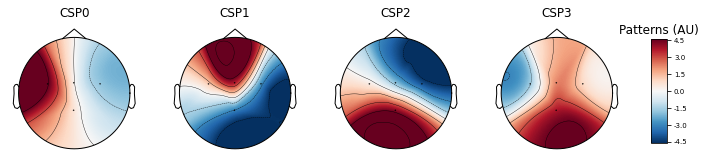

Computing rank from data with rank=None
    Using tolerance 8.7e-07 (2.2e-16 eps * 4 dim * 9.8e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9.1e-07 (2.2e-16 eps * 4 dim * 1e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.9e-07 (2.2e-16 eps * 4 dim * 1e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.8e-07 (2.2e-16 eps * 4 dim * 1e+09  max singular value)
    Estimated rank (mag):

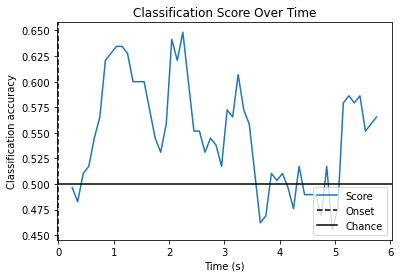

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1501 original time points ...
1 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1.2e-06 (2.2e-16 eps * 4 dim * 1.4e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2e-06 (2.2e-16 eps * 4 dim * 1.4e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


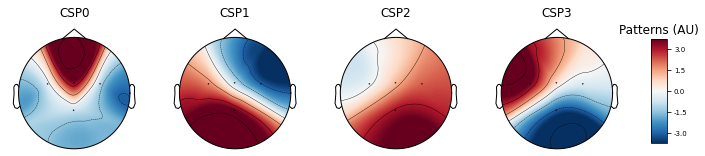

Computing rank from data with rank=None
    Using tolerance 6.3e-07 (2.2e-16 eps * 4 dim * 7.1e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.4e-07 (2.2e-16 eps * 4 dim * 7.2e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.5e-07 (2.2e-16 eps * 4 dim * 7.3e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.3e-07 (2.2e-16 eps * 4 dim * 7.1e+08  max singular value)
    Estimated rank 

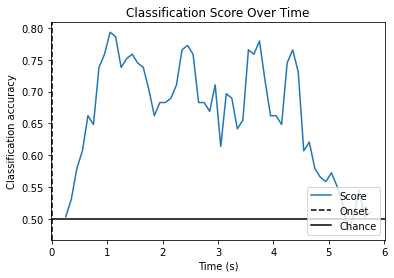

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1501 original time points ...
1 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1.6e-06 (2.2e-16 eps * 4 dim * 1.8e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.8e-06 (2.2e-16 eps * 4 dim * 2e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


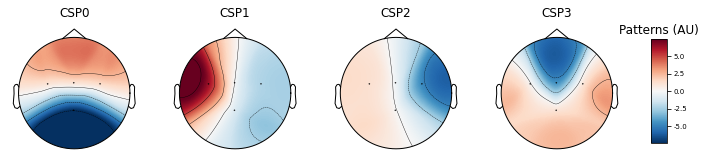

Computing rank from data with rank=None
    Using tolerance 9e-07 (2.2e-16 eps * 4 dim * 1e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1e-06 (2.2e-16 eps * 4 dim * 1.2e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9.1e-07 (2.2e-16 eps * 4 dim * 1e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1e-06 (2.2e-16 eps * 4 dim * 1.1e+09  max singular value)
    Estimated rank (mag): 4
 

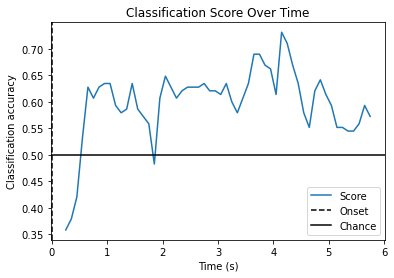

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1501 original time points ...
1 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1.1e-06 (2.2e-16 eps * 4 dim * 1.2e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9.9e-07 (2.2e-16 eps * 4 dim * 1.1e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


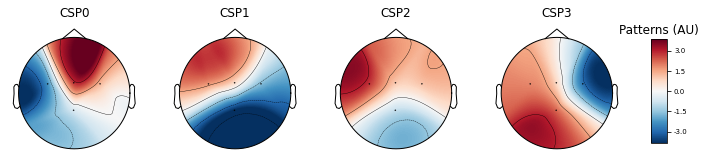

Computing rank from data with rank=None
    Using tolerance 6.1e-07 (2.2e-16 eps * 4 dim * 6.9e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.1e-07 (2.2e-16 eps * 4 dim * 6.9e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.2e-07 (2.2e-16 eps * 4 dim * 7e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.1e-07 (2.2e-16 eps * 4 dim * 6.8e+08  max singular value)
    Estimated rank (m

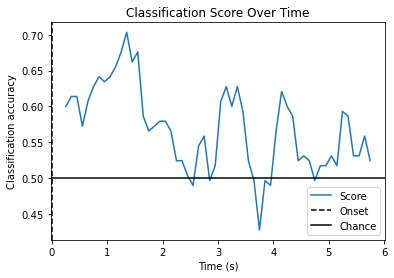

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1501 original time points ...
1 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 2.2e-06 (2.2e-16 eps * 4 dim * 2.5e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.3e-06 (2.2e-16 eps * 4 dim * 2.5e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


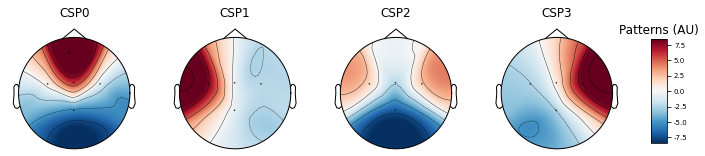

Computing rank from data with rank=None
    Using tolerance 1.4e-06 (2.2e-16 eps * 4 dim * 1.6e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.4e-06 (2.2e-16 eps * 4 dim * 1.6e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.4e-06 (2.2e-16 eps * 4 dim * 1.6e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.4e-06 (2.2e-16 eps * 4 dim * 1.5e+09  max singular value)
    Estimated rank 

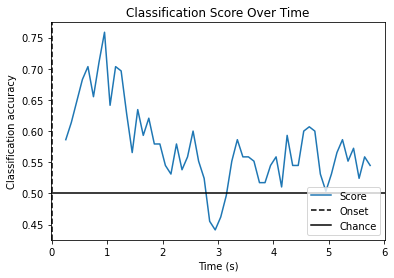

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1501 original time points ...
1 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1.6e-06 (2.2e-16 eps * 4 dim * 1.8e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.6e-06 (2.2e-16 eps * 4 dim * 1.8e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


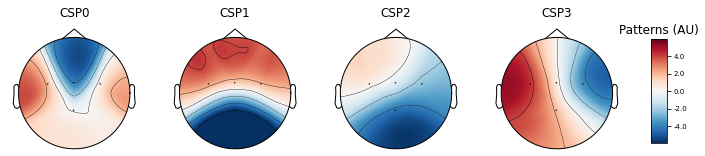

Computing rank from data with rank=None
    Using tolerance 7.4e-07 (2.2e-16 eps * 4 dim * 8.3e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.6e-07 (2.2e-16 eps * 4 dim * 9.7e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.6e-07 (2.2e-16 eps * 4 dim * 8.6e+08  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.3e-07 (2.2e-16 eps * 4 dim * 9.4e+08  max singular value)
    Estimated rank 

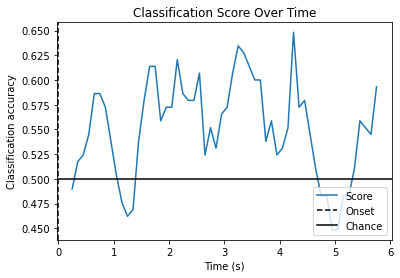

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1501 original time points ...
1 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1.9e-06 (2.2e-16 eps * 4 dim * 2.1e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.3e-06 (2.2e-16 eps * 4 dim * 2.6e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


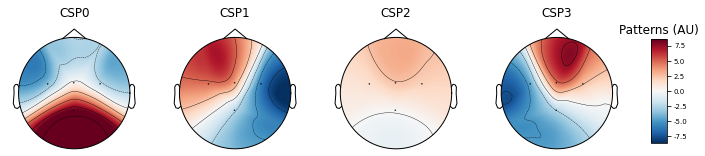

Computing rank from data with rank=None
    Using tolerance 1.1e-06 (2.2e-16 eps * 4 dim * 1.2e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.4e-06 (2.2e-16 eps * 4 dim * 1.6e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.1e-06 (2.2e-16 eps * 4 dim * 1.3e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.4e-06 (2.2e-16 eps * 4 dim * 1.6e+09  max singular value)
    Estimated rank 

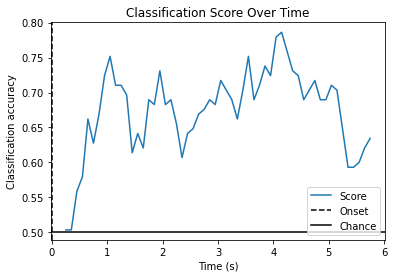

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1501 original time points ...
1 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 2.8e-06 (2.2e-16 eps * 4 dim * 3.1e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3e-06 (2.2e-16 eps * 4 dim * 3.4e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


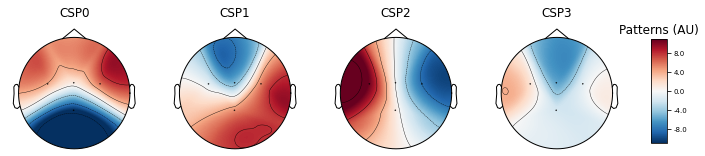

Computing rank from data with rank=None
    Using tolerance 1.7e-06 (2.2e-16 eps * 4 dim * 1.9e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.9e-06 (2.2e-16 eps * 4 dim * 2.2e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.7e-06 (2.2e-16 eps * 4 dim * 1.9e+09  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.8e-06 (2.2e-16 eps * 4 dim * 2.1e+09  max singular value)
    Estimated rank 

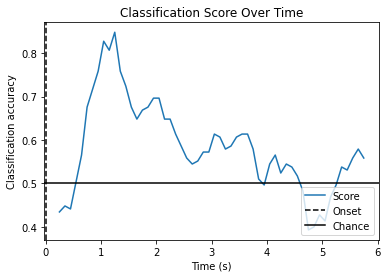

In [29]:
# Create new pipeline with cross_val_score function

results_FootTongue = []
FootTongue_means = []

for raw in raw_list:
    # Standardizing
    standardize(raw)
    
    # Filtering events to look at only left and right
    events, _ = events_from_annotations(raw)
    events = filterFootTongue(events)
    
    # Creating filter
    picks = pick_types(raw.info, meg = False, eeg = True, stim = False, eog = False, exclude = exclude)
    
    # Epoching data
    event_id = dict(foot = 9, tongue = 10)
    epochs, epochs_train = createEpochs(raw, events)
    
    # Splitting testing data + cross-validate
    epochs_data, epochs_data_train, cv, cv_split, labels = crossValidation(epochs, epochs_train)
    
    # CSP begins
    csp = plotCSP(epochs_data, labels)
    
    # Creating pipeline, LDA + printing score results
    lda = LDA()
    clf = Pipeline([('CSP', csp), ('LDA', lda)])
    
    scores = fillScores(clf, epochs_data_train, labels, cv)
    results_FootTongue.append(printResults(labels, scores))
    FootTongue_means.append(np.mean(scores))
    
    # ACCURACY
    sfreq = raw.info['sfreq']
    w_length = int(sfreq * 0.5)
    w_step = int(sfreq * 0.1)
    w_start = np.arange(0, epochs_data.shape[2] - w_length, w_step)
    
    scores_windows = []
    
    for train_idx, test_idx in cv_split:
        y_train, y_test = labels[train_idx], labels[test_idx]
        
        # Filling training and testing sets
        x_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
        x_test = csp.transform(epochs_data_train[test_idx])
        
        # Fit classifier
        lda.fit(x_train, y_train)
        
        # Running classifier
        score_current_window = []
        for n in w_start:
            x_test = csp.transform(epochs_data[test_idx][:, :, n:(n + w_length)])
            score_current_window.append(lda.score(x_test, y_test))
        
        scores_windows.append(score_current_window)
    
    # Plotting LDA figures
    w_times = (w_start + w_length / 2.) / sfreq + epochs.tmin
    
    plt.figure()
    plt.plot(w_times, np.mean(scores_windows, 0), label = 'Score')
    plt.axvline(0, linestyle = '--', color = 'k', label = 'Onset')
    plt.axhline(0.5, linestyle = '-', color = 'k', label = 'Chance')
    plt.xlabel('Time (s)')
    plt.ylabel('Classification accuracy')
    plt.title('Classification Score Over Time')
    plt.legend(loc = 'lower right')
    plt.show()

In [30]:
print(results_FootTongue)

['LDA Classification accuracy: 0.641379 / Chance level: 0.500000', 'LDA Classification accuracy: 0.855172 / Chance level: 0.503497', 'LDA Classification accuracy: 0.675862 / Chance level: 0.503497', 'LDA Classification accuracy: 0.634483 / Chance level: 0.503497', 'LDA Classification accuracy: 0.613793 / Chance level: 0.503497', 'LDA Classification accuracy: 0.682759 / Chance level: 0.503497', 'LDA Classification accuracy: 0.793103 / Chance level: 0.503497', 'LDA Classification accuracy: 0.731034 / Chance level: 0.503497']
